In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("/content/titanic_toy.csv")

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [9]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [10]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [11]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [12]:
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)
x_train['Age_median'] = x_train['Age'].fillna(median_age)

x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)
x_train['Fare_median'] = x_train['Fare'].fillna(median_age)

In [13]:
x_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
399,28.0,12.65,0,28.000000,28.00,12.650000,12.65
274,NaN,7.75,0,29.785904,28.75,7.750000,7.75
428,NaN,7.75,0,29.785904,28.75,7.750000,7.75
0,22.0,7.25,1,22.000000,22.00,7.250000,7.25
490,NaN,NaN,1,29.785904,28.75,32.617597,28.75


In [14]:
x_train.isnull().mean()

Age            0.207865
Fare           0.050562
Family         0.000000
Age_mean       0.000000
Age_median     0.000000
Fare_mean      0.000000
Fare_median    0.000000
dtype: float64

In [15]:
print('Original age variable variance: ', x_train['Age'].var())
print('Age variance after mean imputation: ', x_train['Age_mean'].var())
print('Age variance after median imputation: ', x_train['Age_median'].var())

print('Original fare variable variance: ', x_train['Fare'].var())
print('Fare variance after mean imputation: ', x_train['Fare_mean'].var())
print('Fare variance after median imputation: ', x_train['Fare_median'].var())


Original age variable variance:  204.34951339046142
Age variance after mean imputation:  161.81262452718676
Age variance after median imputation:  161.98956633460548
Original fare variable variance:  2448.1979137063163
Fare variance after mean imputation:  2324.2385256705534
Fare variance after median imputation:  2324.957613614932


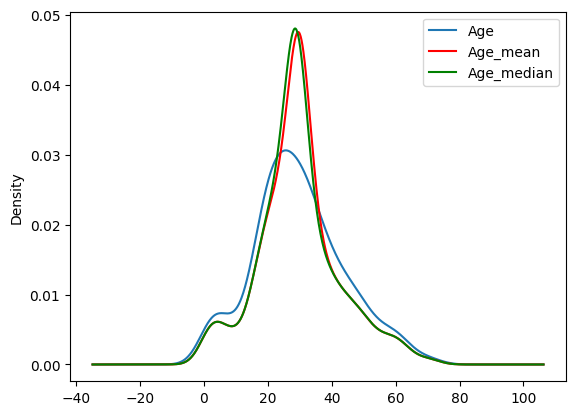

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x_train['Age'].plot(kind='kde', ax=ax)
x_train['Age_mean'].plot(kind='kde', ax=ax, color='red')
x_train['Age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

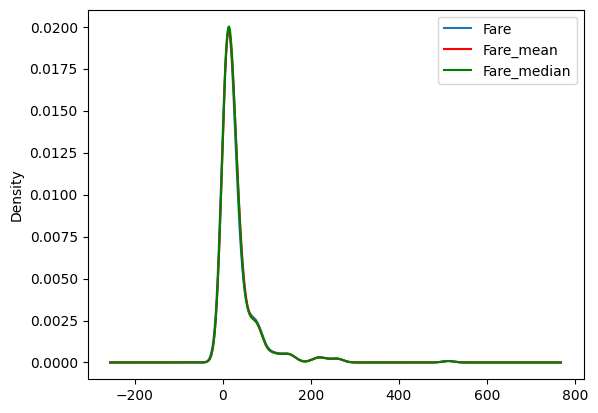

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x_train['Fare'].plot(kind='kde', ax=ax)
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='red')
x_train['Fare_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [19]:
x_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,66.280487
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.404484
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,52.483705
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,54.710043
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,66.280487,2448.197914,16.404484,52.483705,54.710043,2324.238526,2324.957614


<Axes: >

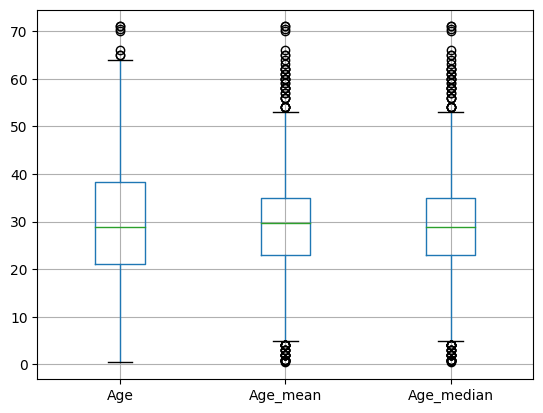

In [20]:
x_train[['Age', 'Age_mean', 'Age_median']].boxplot()

<Axes: >

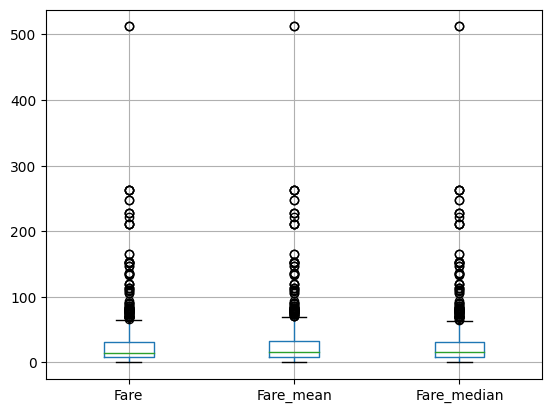

In [21]:
x_train[['Fare', 'Fare_mean', 'Fare_median']].boxplot()

For Fare we can use the mean, median imputation because there is hardly any changes in original form. But for age we can't as too many changes got introduced, analyse the distribution, covariance, correlation and box plots to understand better.

**Using Sklearn**

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [23]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [24]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [25]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [26]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [27]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [28]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [29]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])